In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'marche'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,11,Marche,0,0,0,0,0,0,0,...,0.0,5.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,11,Marche,1,0,1,0,1,1,1,...,0.0,7.0,0.0,0.0,0.00,100.00,14.29,0.00,0.00,0.00
2,2020-02-27T18:00:00,11,Marche,2,1,3,0,3,2,2,...,0.0,18.0,0.0,0.0,33.33,100.00,11.11,0.00,0.00,200.00
3,2020-02-28T18:00:00,11,Marche,3,2,5,1,6,3,3,...,0.0,1.0,0.0,1.0,40.00,83.33,300.00,0.00,100.00,100.00
4,2020-02-29T17:00:00,11,Marche,6,2,8,3,11,5,5,...,0.0,21.0,0.0,2.0,25.00,72.73,23.81,0.00,0.00,83.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-02-19T17:00:00,11,Marche,524,82,606,7895,8501,145,488,...,17.0,5145.0,3127.0,138.0,13.53,7.13,9.48,15.61,3.80,1.74
361,2021-02-20T17:00:00,11,Marche,532,80,612,8081,8693,192,547,...,8.0,5970.0,3782.0,186.0,13.07,7.04,9.16,14.46,-2.44,2.26
362,2021-02-21T17:00:00,11,Marche,531,75,606,8306,8912,219,488,...,7.0,5876.0,4087.0,225.0,12.38,6.80,8.30,11.94,-6.25,2.52
363,2021-02-22T17:00:00,11,Marche,543,78,621,8288,8909,-3,117,...,11.0,1047.0,524.0,-18.0,12.56,6.97,11.17,22.33,4.00,-0.03


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 581
Nuovi tamponi: 7316.0
Percentuale nuovi positivi/nuovi tamponi: 7.9 %
Nuovi guariti: 357.0
Nuovi deceduti: 9.0
Variazione positivi ricoverati con sintomi: 12.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 203.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-25T17:00:00,11,Marche,398,60,458,9109,9567,152,603,...,12.0,6711.0,5062.0,167.0,13.10,4.79,8.99,11.91,-6.25,1.61
1,2020-12-26T17:00:00,11,Marche,412,64,476,9159,9635,68,206,...,6.0,1797.0,1270.0,50.0,13.45,4.94,11.46,16.22,6.67,0.71
2,2020-12-27T17:00:00,11,Marche,428,65,493,9178,9671,36,181,...,5.0,1173.0,541.0,19.0,13.18,5.10,15.43,33.46,1.56,0.37
3,2020-12-28T17:00:00,11,Marche,454,60,514,9223,9737,66,131,...,8.0,1039.0,474.0,45.0,11.67,5.28,12.61,27.64,-7.69,0.68
4,2020-12-29T17:00:00,11,Marche,465,61,526,9603,10129,392,508,...,11.0,4229.0,2653.0,380.0,11.60,5.19,12.01,19.15,1.67,4.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-19T17:00:00,11,Marche,524,82,606,7895,8501,145,488,...,17.0,5145.0,3127.0,138.0,13.53,7.13,9.48,15.61,3.80,1.74
57,2021-02-20T17:00:00,11,Marche,532,80,612,8081,8693,192,547,...,8.0,5970.0,3782.0,186.0,13.07,7.04,9.16,14.46,-2.44,2.26
58,2021-02-21T17:00:00,11,Marche,531,75,606,8306,8912,219,488,...,7.0,5876.0,4087.0,225.0,12.38,6.80,8.30,11.94,-6.25,2.52
59,2021-02-22T17:00:00,11,Marche,543,78,621,8288,8909,-3,117,...,11.0,1047.0,524.0,-18.0,12.56,6.97,11.17,22.33,4.00,-0.03


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

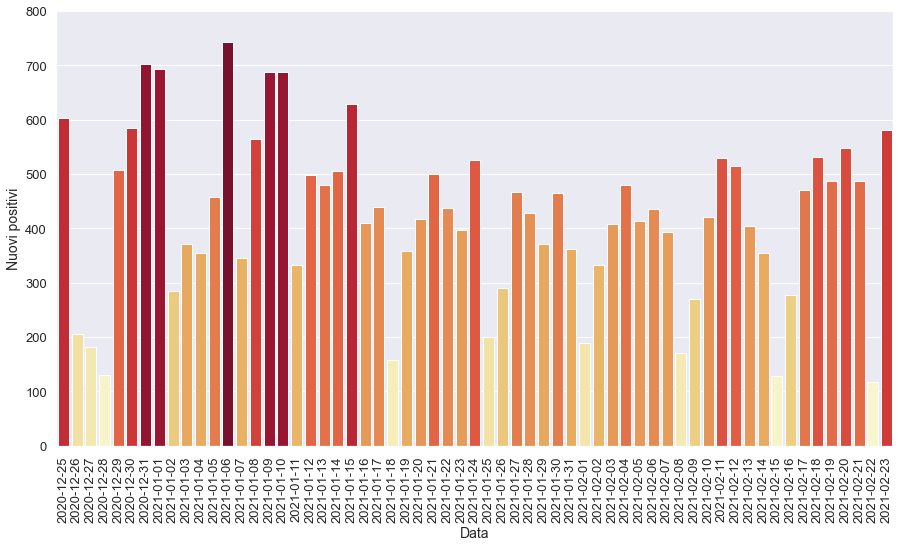

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

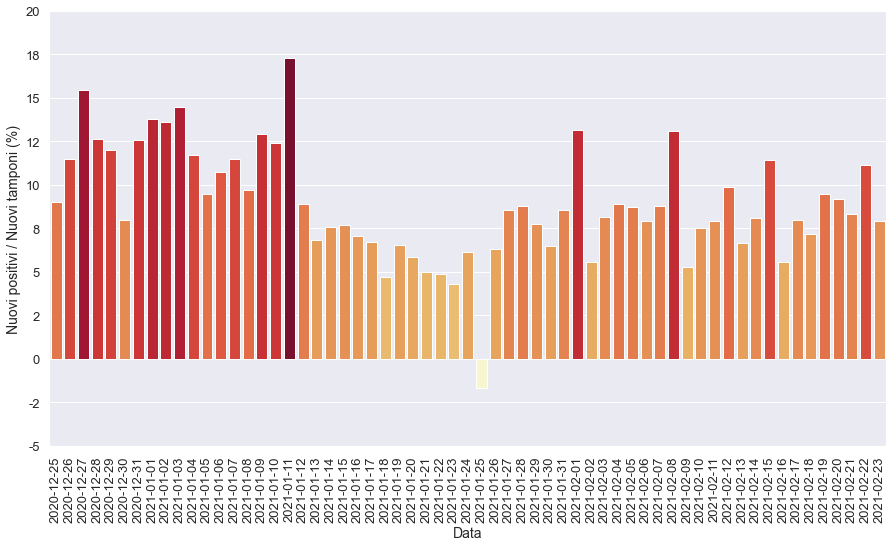

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

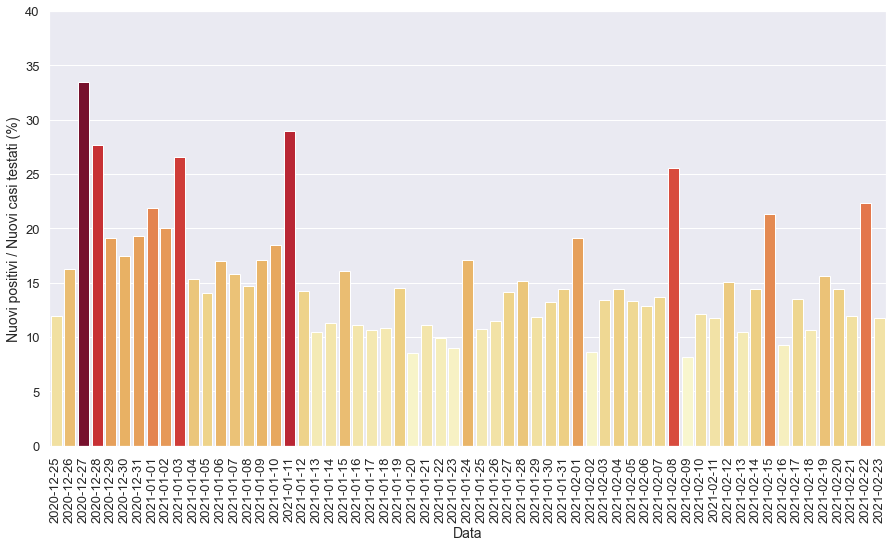

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

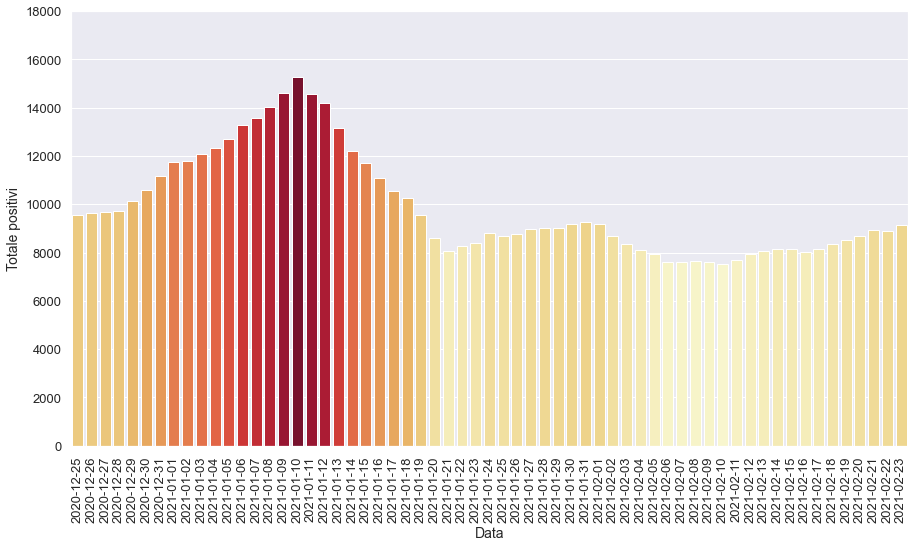

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

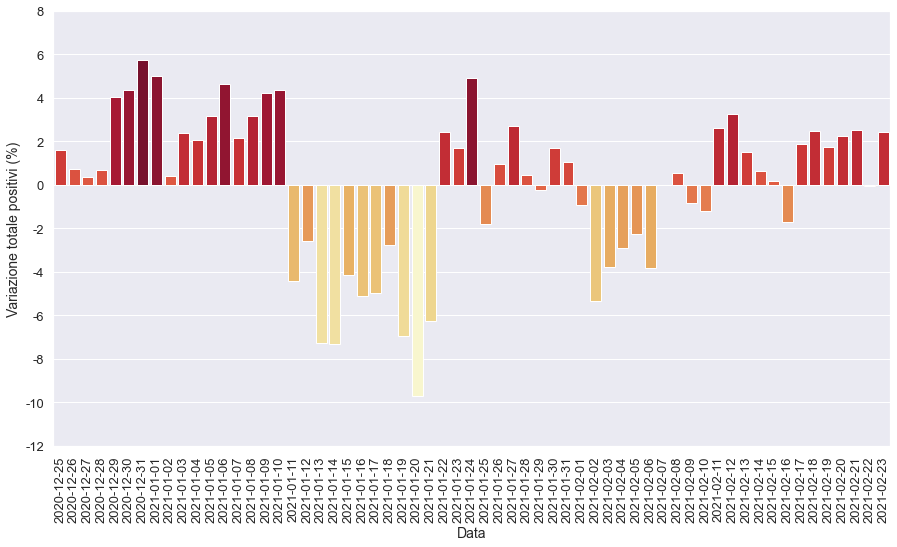

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

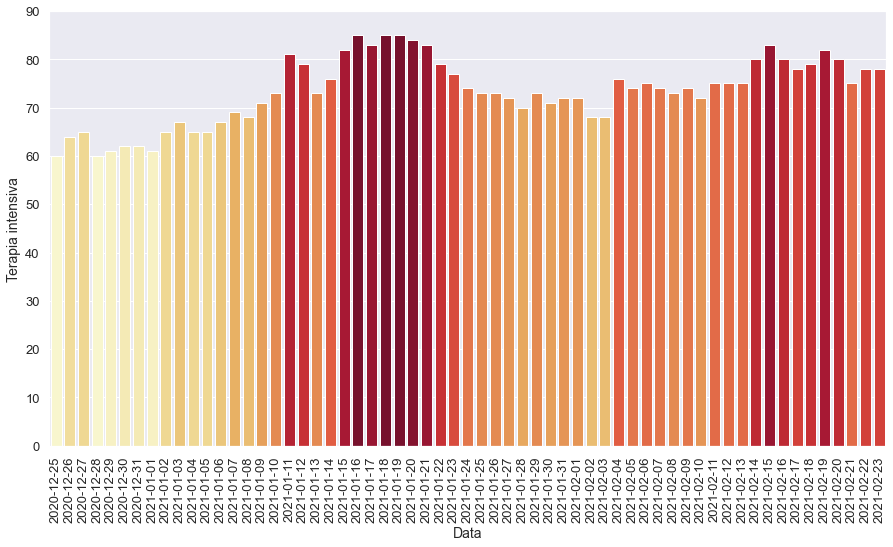

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

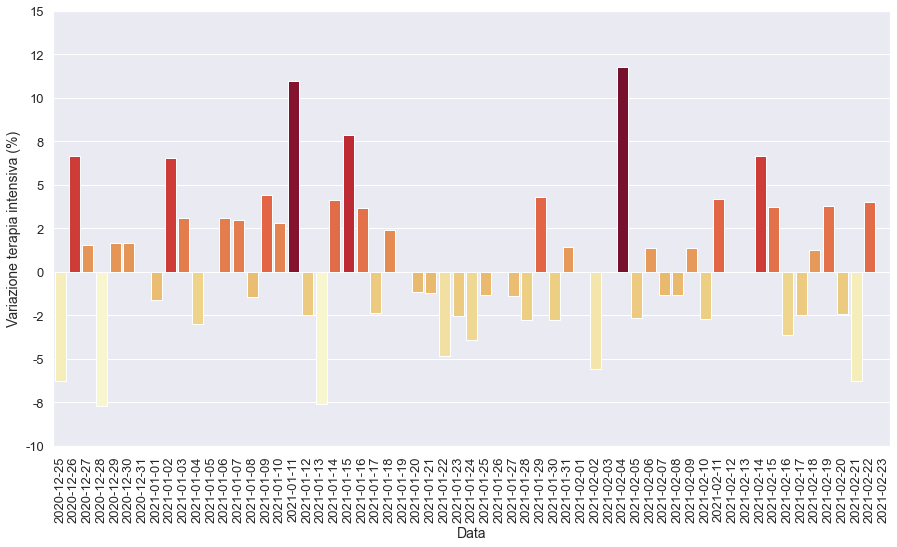

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

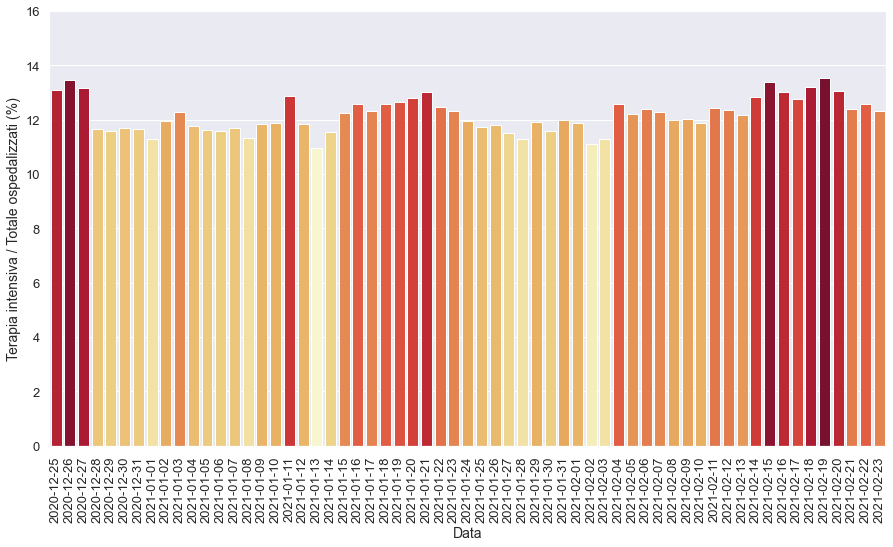

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

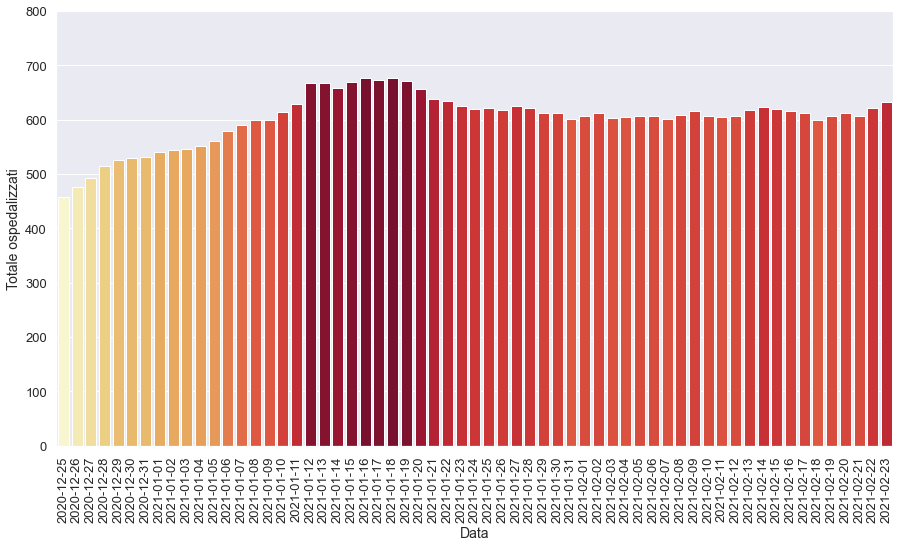

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

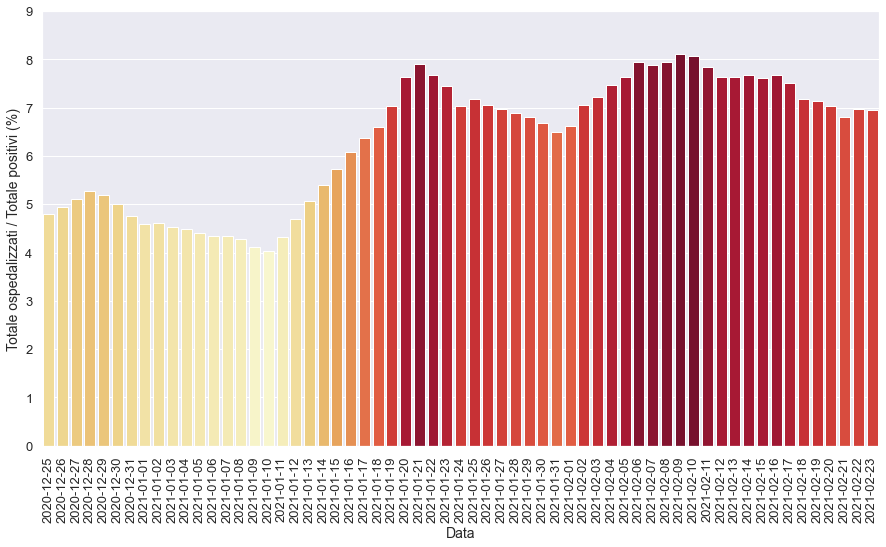

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

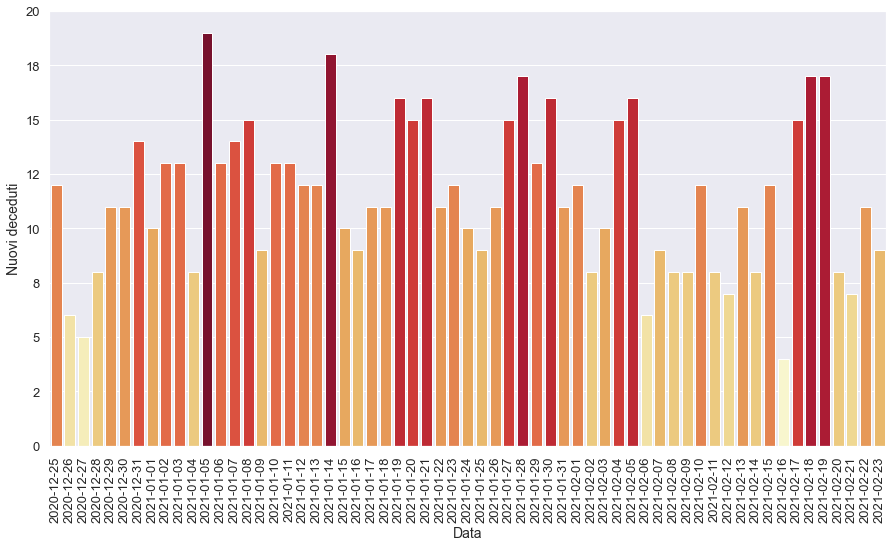

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

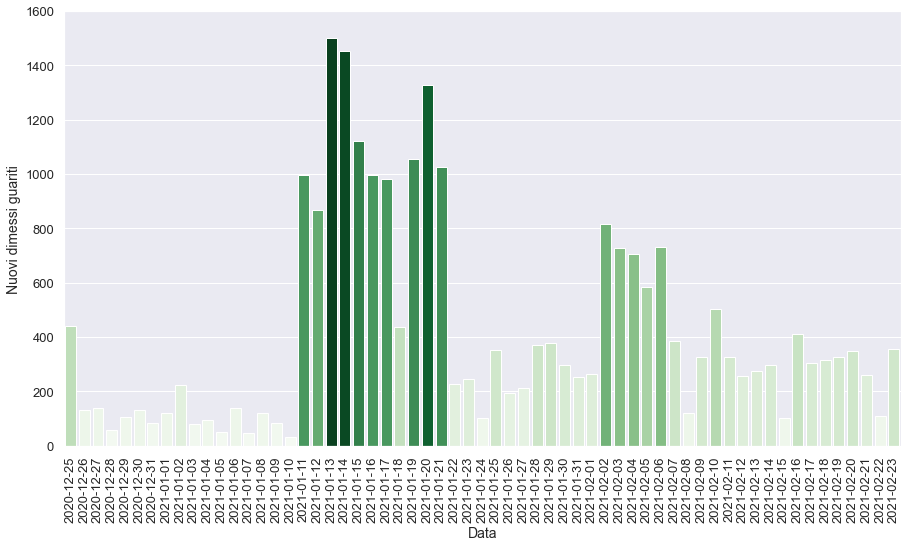

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,11,Marche,546,74,620,8205,8825,414,525,...,10.0,8569.0,3069.0,420.0,11.94,7.03,6.13,17.11,-3.90,4.92
1,2021-01-25T17:00:00,11,Marche,549,73,622,8042,8664,-161,200,...,9.0,-12043.0,1862.0,-163.0,11.74,7.18,-1.66,10.74,-1.35,-1.82
2,2021-01-26T17:00:00,11,Marche,545,73,618,8130,8748,84,291,...,11.0,4618.0,2540.0,88.0,11.81,7.06,6.30,11.46,0.00,0.97
3,2021-01-27T17:00:00,11,Marche,554,72,626,8360,8986,238,466,...,15.0,5452.0,3301.0,230.0,11.50,6.97,8.55,14.12,-1.37,2.72
4,2021-01-28T17:00:00,11,Marche,551,70,621,8406,9027,41,429,...,17.0,4886.0,2832.0,46.0,11.27,6.88,8.78,15.15,-2.78,0.46
5,2021-01-29T17:00:00,11,Marche,540,73,613,8394,9007,-20,371,...,13.0,4780.0,3132.0,-12.0,11.91,6.81,7.76,11.85,4.29,-0.22
6,2021-01-30T17:00:00,11,Marche,542,71,613,8547,9160,153,465,...,16.0,7159.0,3517.0,153.0,11.58,6.69,6.50,13.22,-2.74,1.70
7,2021-01-31T17:00:00,11,Marche,529,72,601,8657,9258,98,362,...,11.0,4227.0,2511.0,110.0,11.98,6.49,8.56,14.42,1.41,1.07
8,2021-02-01T17:00:00,11,Marche,535,72,607,8565,9172,-86,189,...,12.0,1439.0,988.0,-92.0,11.86,6.62,13.13,19.13,0.00,-0.93
9,2021-02-02T17:00:00,11,Marche,544,68,612,8069,8681,-491,333,...,8.0,5958.0,3848.0,-496.0,11.11,7.05,5.59,8.65,-5.56,-5.35


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

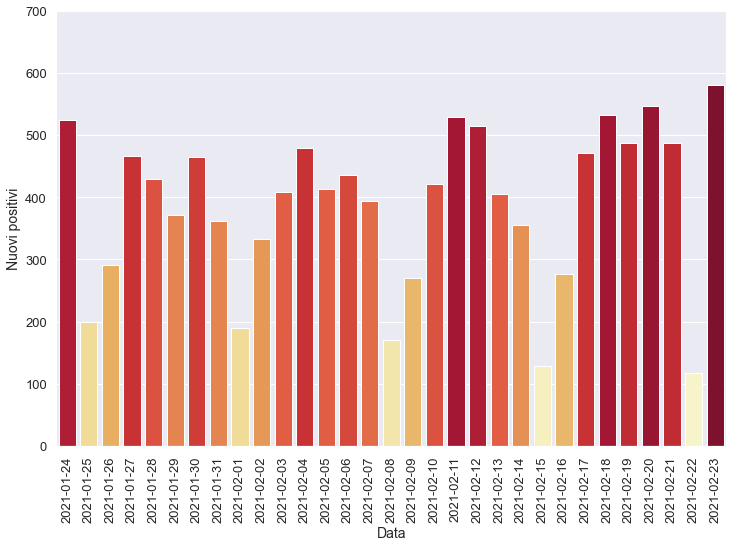

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

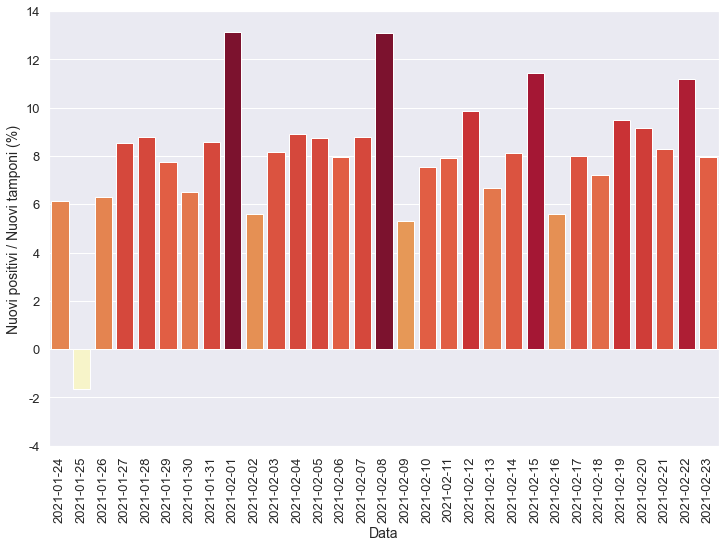

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

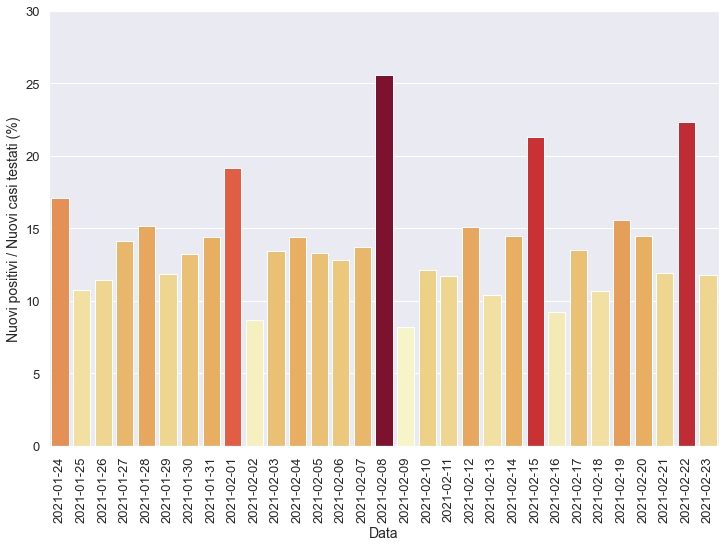

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

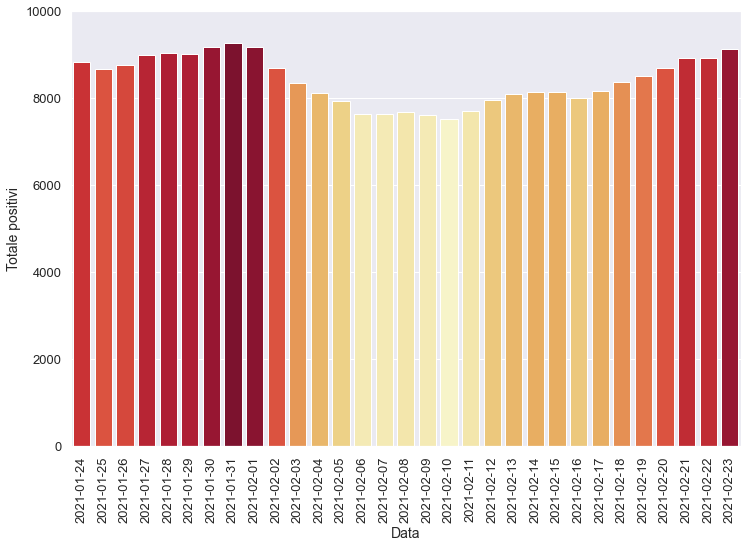

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

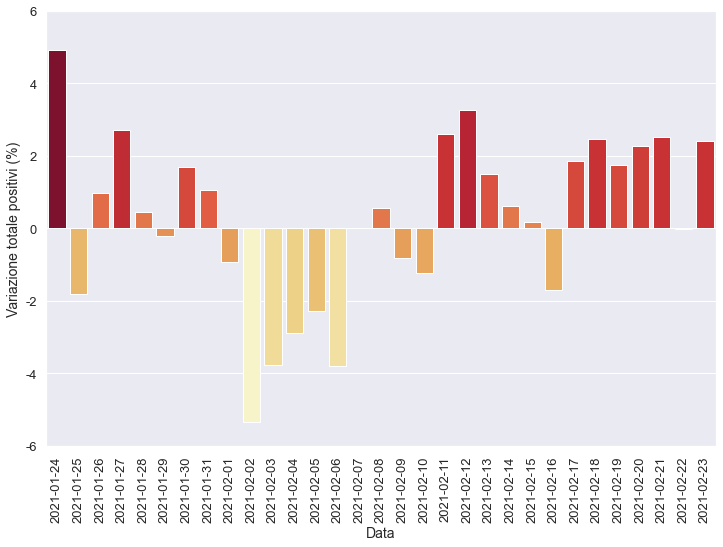

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

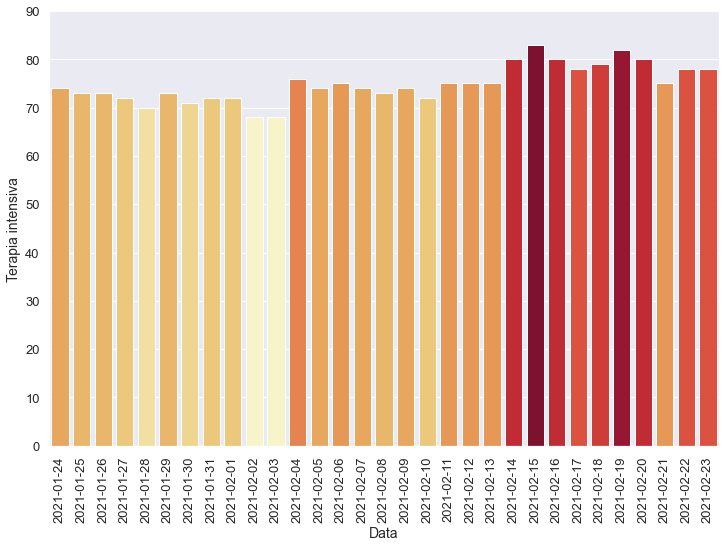

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

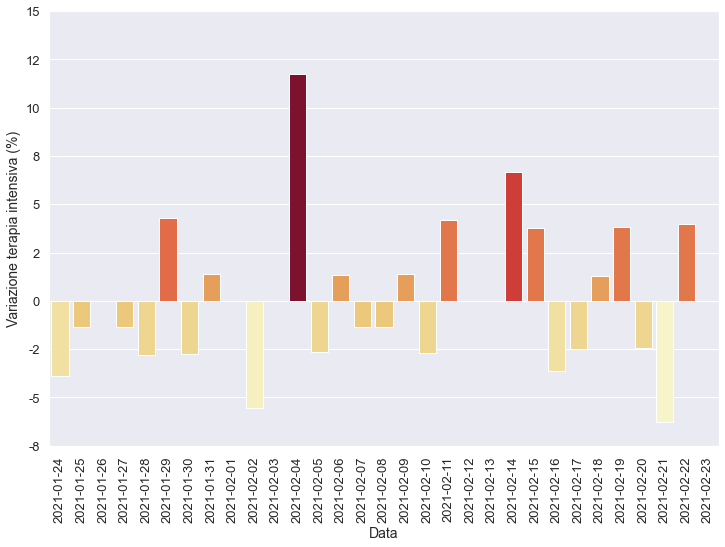

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

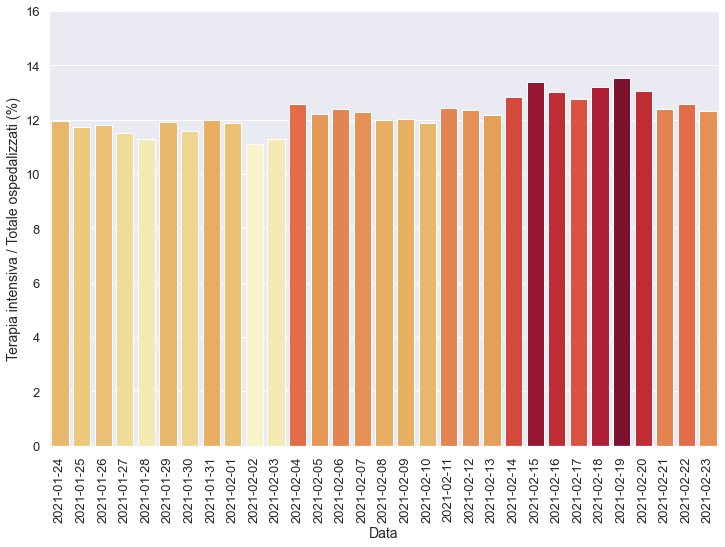

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

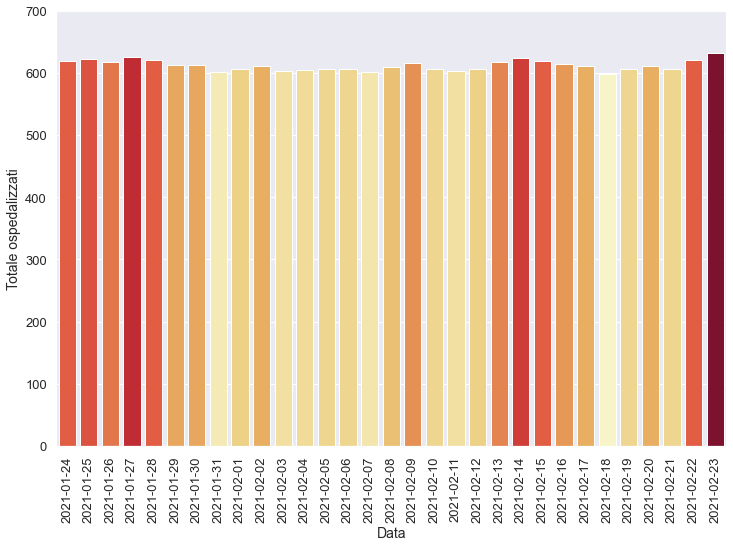

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

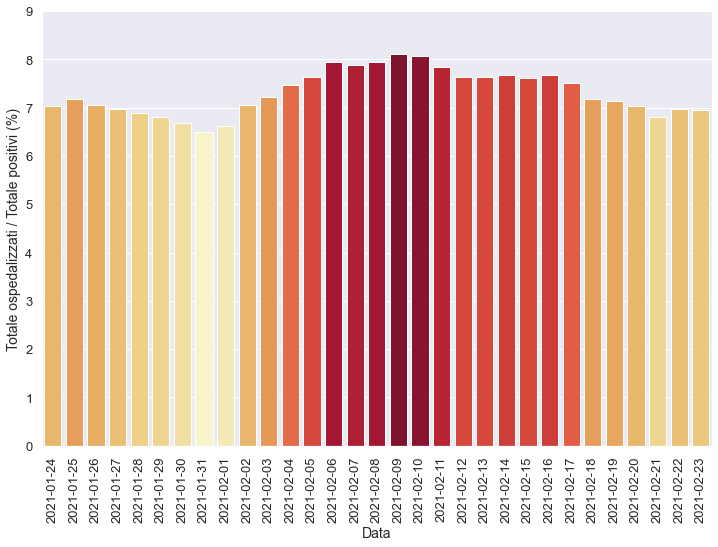

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

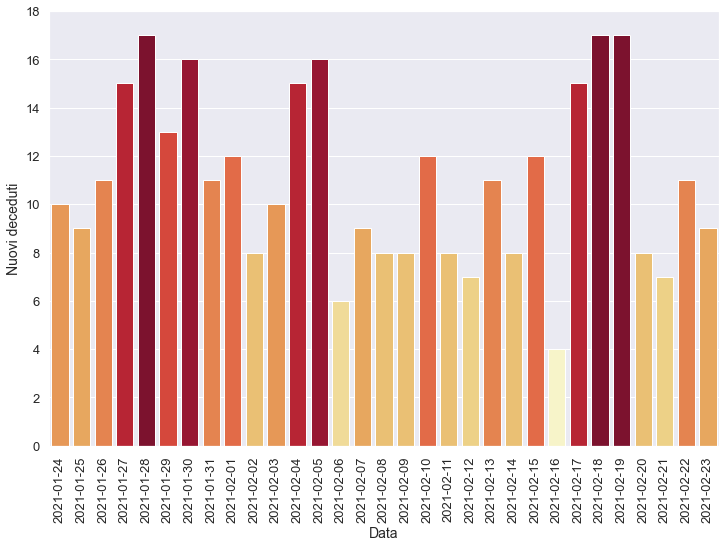

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

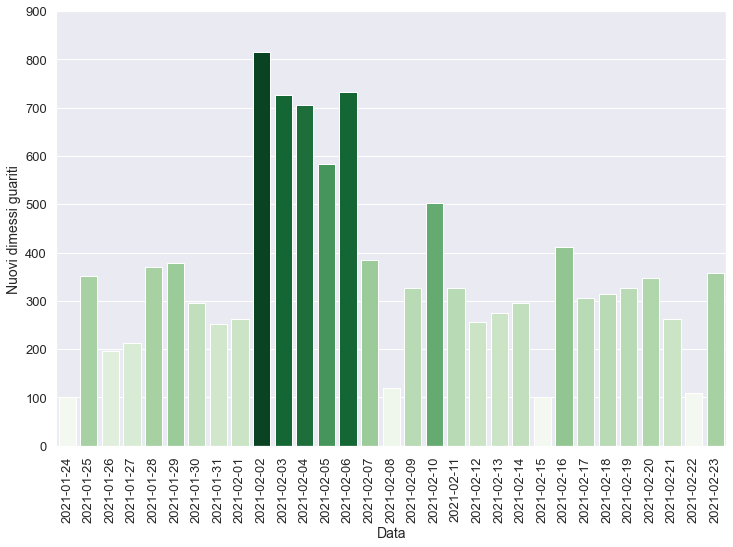

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-16T17:00:00,11,Marche,535,80,615,7390,8005,-139,277,...,4.0,4962.0,2995.0,-134.0,13.01,7.68,5.58,9.25,-3.61,-1.71
1,2021-02-17T17:00:00,11,Marche,534,78,612,7543,8155,150,471,...,15.0,5891.0,3483.0,153.0,12.75,7.50,8.00,13.52,-2.50,1.87
2,2021-02-18T17:00:00,11,Marche,520,79,599,7757,8356,201,532,...,17.0,7399.0,4994.0,214.0,13.19,7.17,7.19,10.65,1.28,2.46
3,2021-02-19T17:00:00,11,Marche,524,82,606,7895,8501,145,488,...,17.0,5145.0,3127.0,138.0,13.53,7.13,9.48,15.61,3.80,1.74
4,2021-02-20T17:00:00,11,Marche,532,80,612,8081,8693,192,547,...,8.0,5970.0,3782.0,186.0,13.07,7.04,9.16,14.46,-2.44,2.26
5,2021-02-21T17:00:00,11,Marche,531,75,606,8306,8912,219,488,...,7.0,5876.0,4087.0,225.0,12.38,6.80,8.30,11.94,-6.25,2.52
6,2021-02-22T17:00:00,11,Marche,543,78,621,8288,8909,-3,117,...,11.0,1047.0,524.0,-18.0,12.56,6.97,11.17,22.33,4.00,-0.03
7,2021-02-23T17:00:00,11,Marche,555,78,633,8491,9124,215,581,...,9.0,7316.0,4942.0,203.0,12.32,6.94,7.94,11.76,0.00,2.41


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

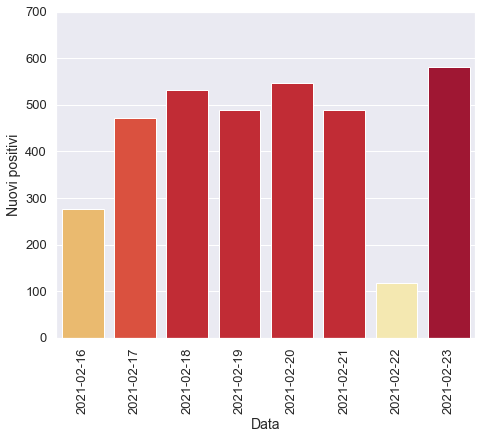

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

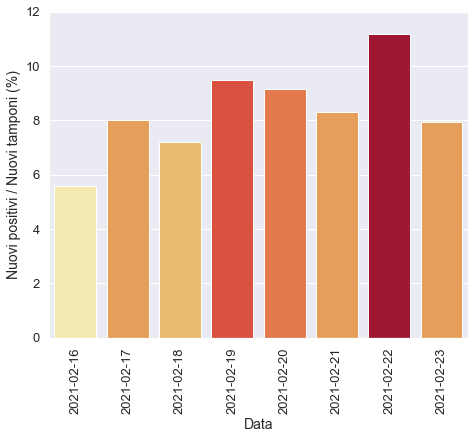

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

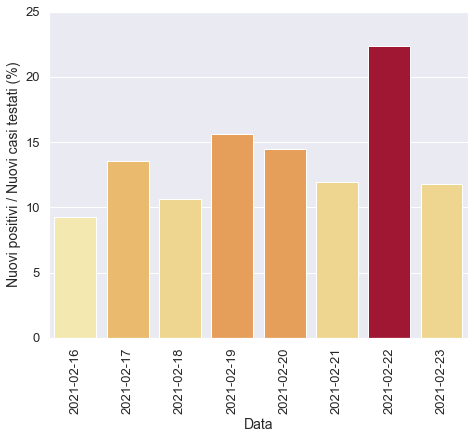

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

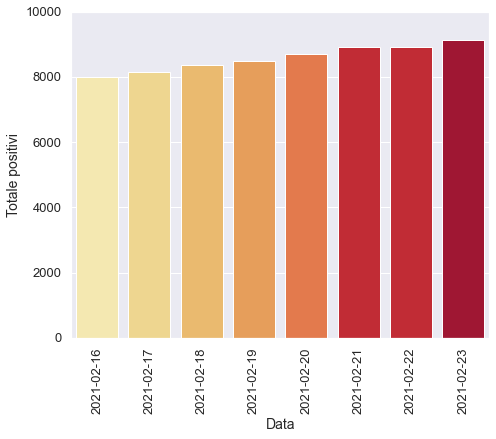

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

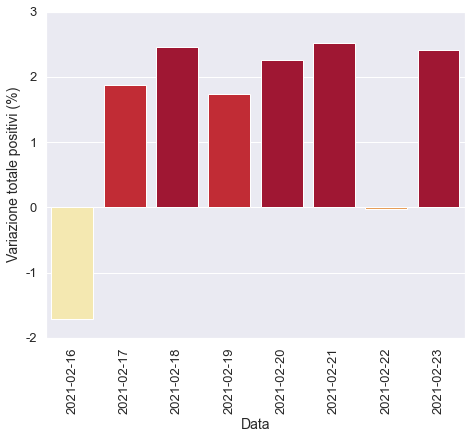

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

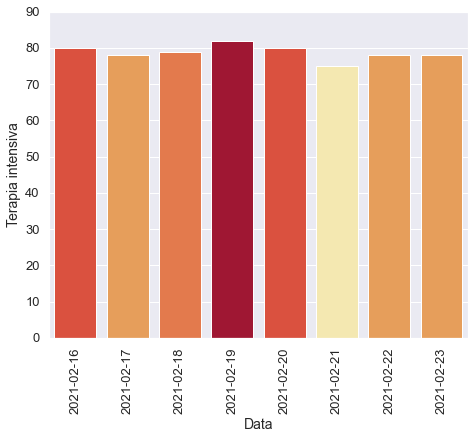

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

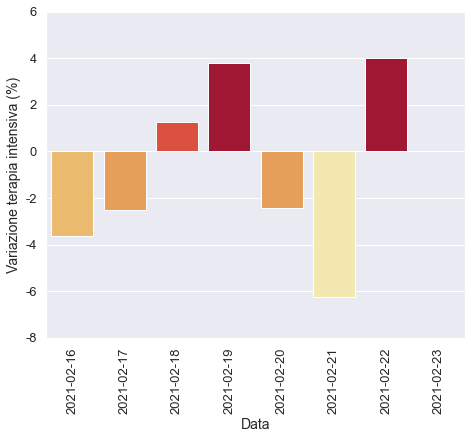

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

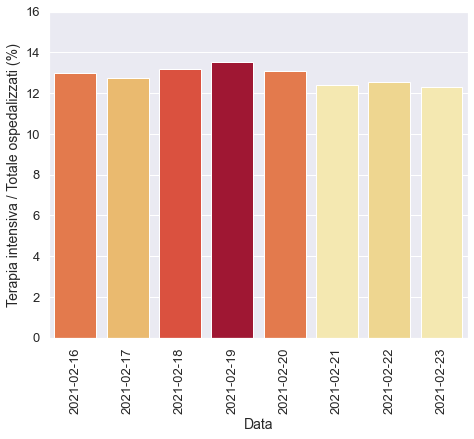

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

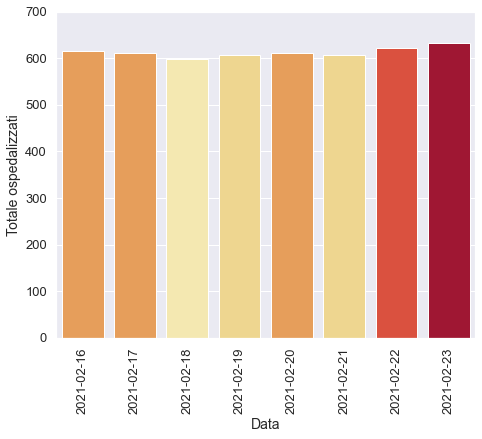

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

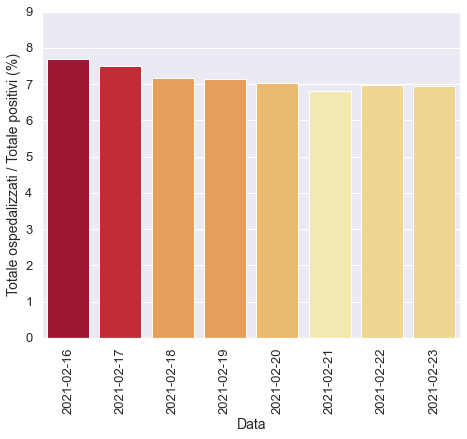

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

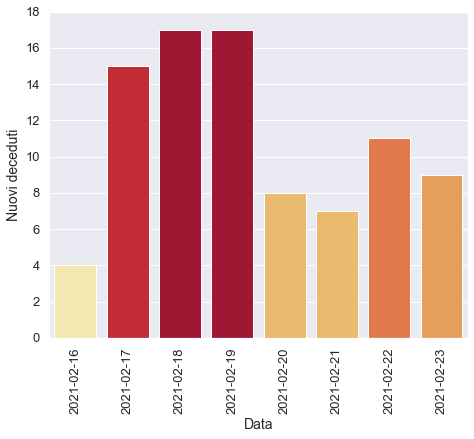

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

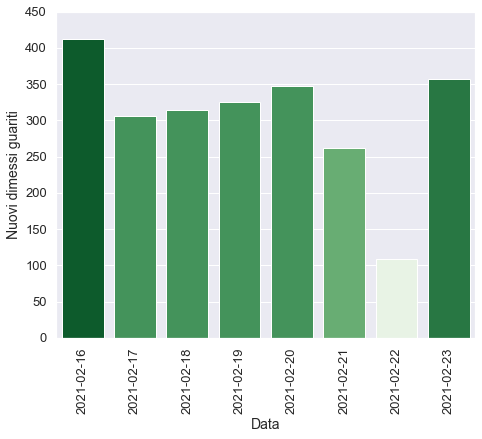

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)